# Question 3

I couldn't get the .DAT file to run, so instead I changed file to a csv and used the following to get it into a workable form:

In [1]:
Y_matrix <- as.matrix(read.csv(file="/Users/alexwiigs/Documents/Code/STAT 553 Assigmnents/T3_6_PROBE.csv", header = FALSE, sep = ""))
Y_matrix <- Y_matrix[,-1]
colnames(Y_matrix) <- c("y1","y2","y3","y4","y5")
Y_matrix

y1,y2,y3,y4,y5
51,36,50,35,42
27,20,26,17,27
37,22,41,37,30
42,36,32,34,27
27,18,33,14,29
43,32,43,35,40
41,22,36,25,38
38,21,31,20,16
36,23,27,25,28
26,31,31,32,36


In [2]:
z_1 <- Y_matrix[,1] + Y_matrix[,2] + Y_matrix[,3]
z_1

[1] 137  73 100 110  78 118  99  90  86  88  74

In [3]:
z_2 <- Y_matrix[,1] + Y_matrix[,2] + Y_matrix[,3] + Y_matrix[,4] + Y_matrix[,5]
z_2

[1] 214 117 167 171 121 193 162 126 139 156 125

In [4]:
z_3 <- Y_matrix[,1] - Y_matrix[,3]
z_3

[1]  1  1 -4 10 -6  0  5  7  9 -5  4

In [5]:
z_4 <- Y_matrix[,2] - Y_matrix[,5]
z_4

[1]  -6  -7  -8   9 -11  -8 -16   5  -5  -5  -5

## a)

We can find the sample correlation matrix $R_y$ like so:

In [6]:
R_y <- cor(Y_matrix)
round(R_y,2)

,y1,y2,y3,y4,y5
y1,1.00,0.61,0.76,0.58,0.41
y2,0.61,1.00,0.55,0.75,0.55
y3,0.76,0.55,1.00,0.61,0.69
y4,0.58,0.75,0.61,1.00,0.52
y5,0.41,0.55,0.69,0.52,1.00


We can calculate $|R_y|$ with:

In [24]:
det(R_y)

[1] 0.0409186

## b)

First we put the $z_i$ vectors we created into their own matrix:

In [7]:
Z_matrix <- matrix(c(z_1,z_2,z_3,z_4), ncol = 4)
colnames(Z_matrix) <- c("z1","z2","z3","z4")
Z_matrix

z1,z2,z3,z4
137,214,1,-6
73,117,1,-7
100,167,-4,-8
110,171,10,9
78,121,-6,-11
118,193,0,-8
99,162,5,-16
90,126,7,5
86,139,9,-5
88,156,-5,-5


Then we calclulate the covariance with R like so:

In [8]:
S_z <- cov(Z_matrix)
round(S_z,2)

,z1,z2,z3,z4
z1,392.22,601.62,9.1,13.75
z2,601.62,995.42,-7.2,-7.45
z3,9.10,-7.20,30.6,20.40
z4,13.75,-7.45,20.4,47.56


and the trace:

In [27]:
library(psych)
tr(S_z)

[1] 1465.8

Double check:

In [28]:
sum(diag(S_z))

[1] 1465.8

## c)

$R_y$ will be positive definite if all its eigenvalues are greater than 0. We can test like so:

In [29]:
eigen(R_y)

eigen() decomposition
$values
[1] 3.4164933 0.6144313 0.5722740 0.2712115 0.1255899

$vectors
           [,1]       [,2]       [,3]       [,4]       [,5]
[1,] -0.4418394 -0.2006104 -0.6786078 -0.2125365  0.5087760
[2,] -0.4535595 -0.4280646  0.3491277 -0.6055405 -0.3499642
[3,] -0.4727808  0.3678765 -0.3754368  0.2581448 -0.6584479
[4,] -0.4536224 -0.3934629  0.3345386  0.7010073  0.1899641
[5,] -0.4120276  0.6974023  0.4058723 -0.1734903  0.3860467


All the eigenvalues are greater then 0, so we conclude that $R_y$ is positive definitate.

## d)

If mean vectors $\textbf{y}$ and $\textbf{z}$ satisfy $\textbf{z} = \textbf{A} \textbf{y}$, where $\textbf{A}$ is a $4\times 5$ matrix. Then we have:  
$$ \begin{pmatrix} z_1 \\ z_2 \\ z_3 \\ z_4 \end{pmatrix} = \begin{pmatrix} a_{11} & a_{12} & a_{13} & a_{14} & a_{15} \\ a_{21} & a_{22} & a_{23} & a_{24} & a_{25} \\ a_{31} & a_{32} & a_{33} & a_{34} & a_{35} \\ a_{41} & a_{42} & a_{43} & a_{44} & a_{45} \end{pmatrix} \begin{pmatrix} y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5 \end{pmatrix} = \begin{pmatrix} y_1a_{11} & y_2a_{12} & y_3a_{13} & y_4a_{14} & y_5a_{15} \\ y_1a_{21} & y_2a_{22} & y_3a_{23} & y_4a_{24} & y_5a_{25} \\ y_1a_{31} & y_2a_{32} & y_3a_{33} & y_4a_{34} & y_5a_{35} \\ y_1a_{41} & y_2a_{42} & y_3a_{43} & y_4a_{44} & y_5a_{45} \end{pmatrix}$$  
  
It is obvious to see that the matrix $\textbf{A}$ just contains the linear equations used to define $z_i$ at the start of question 3, so we have: 
$$ \textbf{A} = \begin{pmatrix} 1 & 1 & 1 & 0 & 0 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 0 & -1 & 0 & 0 \\ 0 & 1 & 0 & 0 & -1 \end{pmatrix}$$


We confirm with Jacobian Matrix on $z$:  

$$ \textbf{A} = \begin{pmatrix} \frac{\partial y_1}{\partial z_1} & \frac{\partial y_2}{\partial z_1} & \frac{\partial y_3}{\partial z_1} & \frac{\partial y_4}{\partial z_1} & \frac{\partial y_5}{\partial z_1} \\ \frac{\partial y_1}{\partial z_2} & \frac{\partial y_2}{\partial z_2} & \frac{\partial y_3}{\partial z_2} & \frac{\partial y_4}{\partial z_2} & \frac{\partial y_5}{\partial z_2} \\ \frac{\partial y_1}{\partial z_3} & \frac{\partial y_2}{\partial z_3} & \frac{\partial y_3}{\partial z_3} & \frac{\partial y_4}{\partial z_3} & \frac{\partial y_5}{\partial z_3} \\ \frac{\partial y_1}{\partial z_4} & \frac{\partial y_2}{\partial z_4} & \frac{\partial y_3}{\partial z_4} & \frac{\partial y_4}{\partial z_4} & \frac{\partial y_5}{\partial z_4} \end{pmatrix} = \begin{pmatrix} 1 & 1 & 1 & 0 & 0 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 0 & -1 & 0 & 0 \\ 0 & 1 & 0 & 0 & -1 \end{pmatrix}$$

Double Check:

In [60]:
j_vector <- matrix(c(1,1,1,1,1,1,1,1,1,1,1))
Y_bar <- t(j_vector) %*% Y_matrix * 1/11
Z_bar <- t(j_vector) %*% Z_matrix * 1/11
Y_bar
Z_bar


y1,y2,y3,y4,y5
36.09091,25.54545,34.09091,27.27273,30.72727


z1,z2,z3,z4
95.72727,153.7273,2,-5.181818


In [65]:
A_matrix <- matrix(c(1,1,1,0,1,1,0,1,1,1,-1,0,0,1,0,0,0,1,0,-1), 4, 5)
A_matrix
A_matrix %*% t(Y_bar)

1,1,1,0,0
1,1,1,1,1
1,0,-1,0,0
0,1,0,0,-1


95.727273
153.727273
2.000000
-5.181818


As expected.

# Question 4

## a)

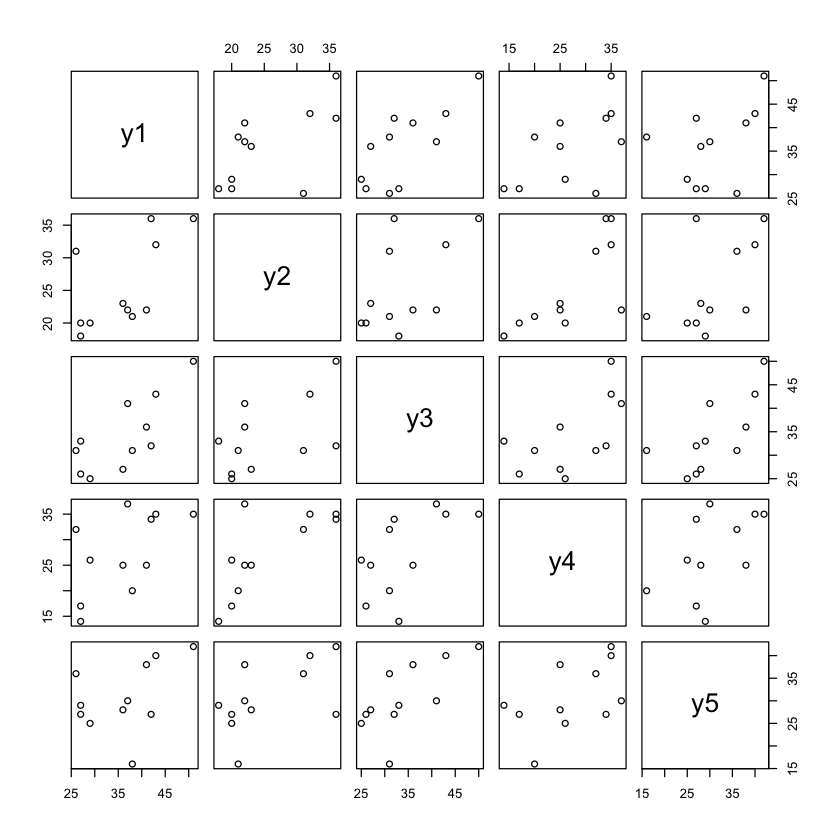

In [73]:
pairs(Y_matrix)

## b)

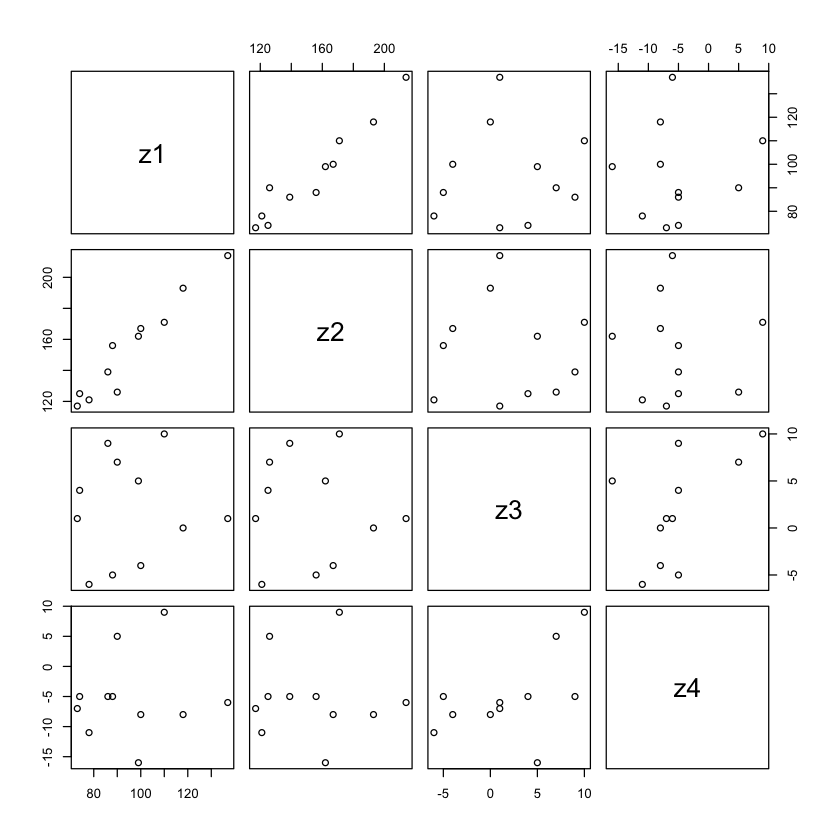

In [72]:
pairs(Z_matrix)

## c)

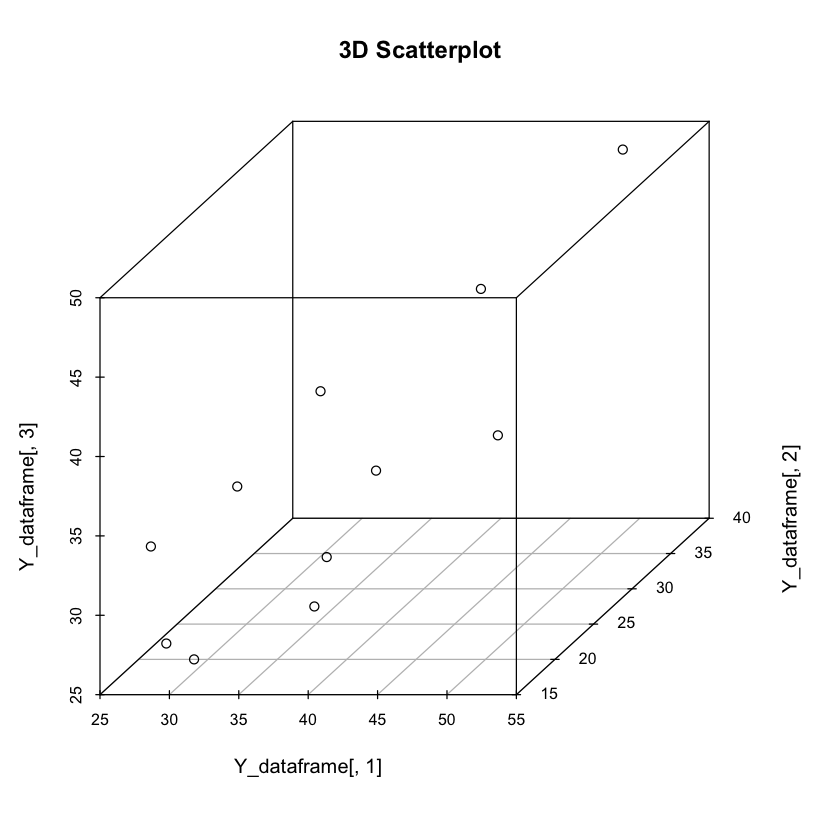

In [71]:
library(scatterplot3d)
Y_dataframe <- as.data.frame(Y_matrix)
attach(Y_dataframe)
scatterplot3d(Y_dataframe[,1], Y_dataframe[,2], Y_dataframe[,3], main = "3D Scatterplot")